In [3]:
# Preliminaries
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

***

# Question 1

## Data Set

The file `student_score.csv` contains student score data from two schools: `MS` and `GP`. Each student from these schools is given a unique alphanumeric `student_id`. The `address` column either reads `U` or `R` to denote whether the student lives in an urban or a rural area. A count of absent days for each student is recorded under the column `absences`. Entries under columns `subject_1`, `subject_2` and `subject_3` denote the marks scored in three different subjects.

In [4]:
# Read the CSV file into a Pandas DataFrame
# https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html
student_scores = pd.read_csv("student_scores.csv", index_col=False)

In [5]:
# Display the contents of three randomly sampled rows
student_scores.sample(3)

,school,student_id,sex,age,address,absences,subject_1,subject_2,subject_3
42,GP,STD43,M,15,U,0,14,15,15
643,MS,STD221,F,18,R,4,7,9,10
71,GP,STD72,M,15,U,0,11,9,10


In [6]:
# Display the type of data in each column
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dtypes.html
student_scores.dtypes

school        object
student_id    object
sex           object
age            int64
address       object
absences       int64
subject_1      int64
subject_2      int64
subject_3      int64
dtype: object

In [7]:
# Display just the unique entries under column `school`
student_scores['school'].unique()

array(['GP', 'MS'], dtype=object)

***

### (a)
Consider a random experiement of randomly selecting one student from school `GP`. Compute the probability that the student is female (`F`).

In [10]:
school_GP=student_scores[student_scores['school']=='GP']
total_students_GP=len(school_GP)
female_students_GP=len(school_GP[school_GP['sex']=='F'])
probability_female_GP=female_students_GP/total_students_GP

print("Probability of selecting a female student from school GP:", probability_female_GP)


Probability of selecting a female student from school GP: 0.5602836879432624


### (b)
Consider a random experiement of randomly selecting one student from each school. Compute the probability that neither student scored more than 12 points in `subject_1`.

In [11]:
school_MS=student_scores[student_scores['school']=='MS']
#already read school_GP in before cell

students_MS_less_than_12=len(school_MS[school_MS['subject_1']<=12])
students_GP_less_than_12=len(school_GP[school_GP['subject_1']<=12])

probability_neither_less_than_12=(students_MS_less_than_12/len(school_MS))*(students_GP_less_than_12/len(school_GP))
print("Probability that neither student scored more than 12 points in subject_1:",probability_neither_less_than_12)

Probability that neither student scored more than 12 points in subject_1: 0.4560346450762568


### (c)
Let the random variable $X$ denote the marks received by a randomly selected student in `subject_3`. Is $X$ a discrete or a continuous random variable? Plot the pmf of $X$. (Hint: Use the histogram method from the `matplotlib` module.) What can you say about $X$ by looking at its distrubution? Does $X$ appear to follow any known distribution?

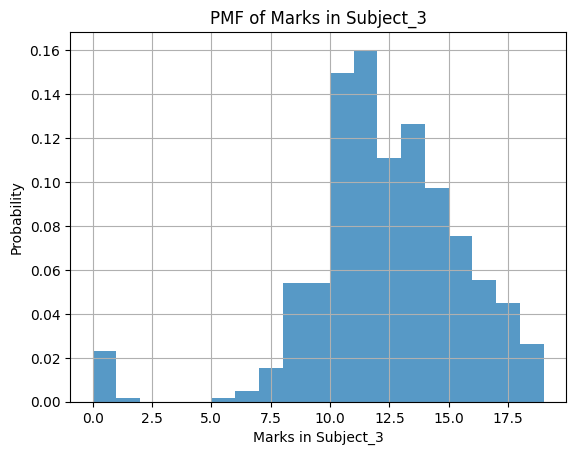

In [13]:
import matplotlib.pyplot as plt
marks_subject_3=student_scores['subject_3']

# Plot the histogram
plt.hist(marks_subject_3,bins=range(0,max(marks_subject_3)+1),density=True,alpha=0.75)
plt.xlabel('Marks in Subject_3')
plt.ylabel('Probability')
plt.title('PMF of Marks in Subject_3')
plt.grid(True)
plt.show()


The graph follows Central Tendency

Central Tendency: The peak of the graph represents the mode of the distribution, indicating the most common score achieved by students in subject_3. The data is clustered in center.


### (d)
Let the random variable $Y$ denote the `subject_3` marks received by a randomly selected student of school `MS`. We can write $Y$ as

$$
X|S=\text{"MS"}
$$
where the random variable $S$ denotes the school of a randomly selected student.

Is $Y$ a discrete or a continuous random variable? Plot the pmf of $Y$. What can you say about $Y$ by looking at its distrubution? How do the distributions of $X$ and $Y$ compare?

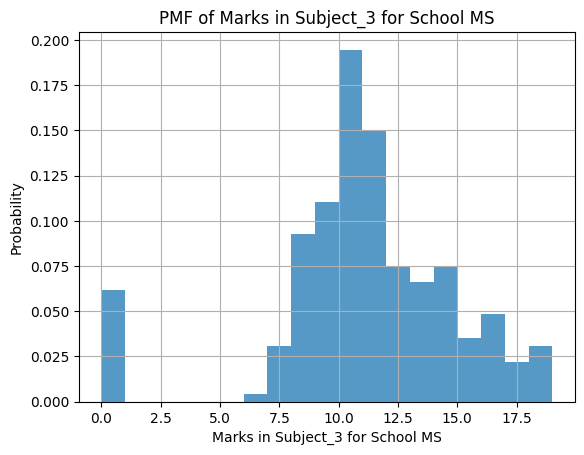

In [15]:
import matplotlib.pyplot as plt
marks_subject_3_MS = school_MS['subject_3']
# Plot the histogram
plt.hist(marks_subject_3_MS, bins=range(0, max(marks_subject_3_MS) + 1), density=True, alpha=0.75)
plt.xlabel('Marks in Subject_3 for School MS')
plt.ylabel('Probability')
plt.title('PMF of Marks in Subject_3 for School MS')
plt.grid(True)
plt.show()


Y are having Discrete Values.The performance of students from school MS in subject_3 follows a similar pattern to that of students from both schools combined.

### (e)
Compute the mean, variance, median and mode of $X$ and $Y$. Can you comment of the skewness of the distributions of $X$ and $Y$ from these values?

In [16]:
import numpy as np

# Calculate mean, variance, median, and mode for X
mean_X=np.mean(marks_subject_3)
variance_X=np.var(marks_subject_3)
median_X=np.median(marks_subject_3)
mode_X=np.argmax(np.bincount(marks_subject_3))

# Calculate mean, variance, median, and mode for Y
mean_Y=np.mean(marks_subject_3_MS)
variance_Y=np.var(marks_subject_3_MS)
median_Y=np.median(marks_subject_3_MS)
mode_Y=np.argmax(np.bincount(marks_subject_3_MS))

print("For X (all students in subject_3):")
print("Mean:", mean_X)
print("Variance:", variance_X)
print("Median:", median_X)
print("Mode:", mode_X)

print("\nFor Y (students from school MS in subject_3):")
print("Mean:", mean_Y)
print("Variance:", variance_Y)
print("Median:", median_Y)
print("Mode:", mode_Y)


For X (all students in subject_3):
Mean: 11.906009244992296
Variance: 10.421057879729629
Median: 12.0
Mode: 11

For Y (students from school MS in subject_3):
Mean: 10.650442477876107
Variance: 14.634446706868196
Median: 11.0
Mode: 10


-In both distributions, the mean is less than the median, indicating that the distributions are left-skewed (negative skewness).
For distribution X (all students), the mode is 11, which is less than both the mean and median, further supporting the left-skewed nature.

-Similarly, for distribution Y (students from school MS), the mode is 10, which is less than both the mean and median, indicating the left-skewed tendency.

-The variance for distribution X (10.42) is lower than that for distribution Y (14.63), suggesting that the scores are more tightly clustered around the mean for X compared to Y.

# Question 2

Derive mean and variance of binomial distribution. Write it down in following markdown cells (it's a good and useful exercise to learn writing mathematical texts in jupyter notebook),

Hint : Binomial random variable is sum of multiple Bernoulli random variable. Use formulas related to expected value and variance of sum of random variables.

In [ ]:
#Mean of Binomial Distribution

***Mean of a Binomial Distribution***:

The mean of a binomial distribution with parameter **n**
 (number of trials) and **p** (probability of success on each trial) can be derived as follows:

A binomial random variable **X** is defined as the sum of **n** independent Bernoulli random variables, each with a probability of success **p** . The expected value (mean) of a single Bernoulli random variable is **p** .

Therefore, the mean of **X** is the sum of the means of the individual Bernoulli random variables:

> $$\mu=np$$



In [ ]:
#Variance of Binomial Distribution

***Variance of a Binomial Distribution:***

The variance ($\sigma^2$)
of a binomial distribution with parameters n and p can be derived as follows:

The variance of a single Bernoulli random variable is **p(1-p)** .

Since the n Bernoulli trials are independent, the variance of the sum of n such variables is the sum of their individual variances:


> $$\sigma^2 = np(1-p)$$



# Question 3

__(a)__ Can two events A and B (with respective non-zero probabilities i.e. $P(A) \neq 0$ and $P(B) \neq 0$) with no intersection be independent of each other ? If yes, elaborate the condition under which it is possible. Also can you intuitively justify the correctness of your answer ?


##Understanding Independence of Events:


Two events $A$ and $B$ with non-zero probabilities can be independent of each other even if they have no intersection.

For two events $A$ and $B$ to be independent, the condition is that the probability of the intersection of the two events $P(A \cap B)$ should be equal to the product of their individual probabilities, $P(A) \times P(B)$.

Now, if $P(A)$ and $P(B)$ are both non-zero and $A$ and $B$ have no intersection ($A \cap B = \emptyset$), then $P(A \cap B)$ is equal to 0. However, if $P(A) \times P(B) = 0$, then the condition for independence holds, as $0 = 0$.

Intuitively, if $A$ and $B$ are two events with non-zero probabilities but no intersection, it means that the occurrence of one event does not influence the occurrence of the other event. In this case, even though $P(A \cap B) = 0$, the events can still be independent as the probability of one event happening does not affect the probability of the other event happening.


__(b)__ Assume $P(A) = 0$ and $P(B) \neq 0$. Can you comment on the depndence/independence of event A and B ? Explain the scenarios when these events will be dependent and independent respectively.

##Analysis of Event Independence


Assume $P(A) = 0$ and $P(B) \neq 0$. In this scenario:

- **Dependence**: Event \( B \) can occur independently of whether event \( A \) occurs or not since event \( A \) never occurs. Therefore, event \( A \) has no influence on event \( B \), and they are independent.

- **Independence**: Regardless of the probability of event \( B \), event \( A \) has zero probability of occurring. Thus, event \( A \) cannot influence event \( B \), and they are independent.



***

---------- END ------------